In [ ]:
!nvidia-smi

In [2]:
import numpy as np

# 定義照片大小
width, height = 224, 224

# 彩色照片有三個通道（RGB）
channels = 3

# 計算記憶體佔用量（以位元組為單位）
memory_usage = width * height * channels * 3  # 假設每個像素使用 4 個位元組（32 位元）

# 將位元組轉換為其他單位（例如 KB、MB）
memory_usage_kb = memory_usage / 1024
memory_usage_mb = memory_usage_kb / 1024
aa=23*1024/memory_usage_mb

print(f"Memory usage per image in ({channels},{width},{height}): {memory_usage_mb:.4f} MB")
print(f'23GB記憶體可儲存資料量:{aa:.0f}張')


Memory usage per image in (3,224,224): 0.4307 MB
23GB記憶體可儲存資料量:54688張


In [2]:
import re

file_names = [
    "semi_anlayic/raif_img/1_a0.96_i197.00 _rt7.06.jpg",
    "semi_anlayic/raif_img/10_a0.51_i197.00 _rt7.01.jpg",
    "semi_anlayic/raif_img/100_a0.61_i197.00 _rt6.79.jpg"
]

labels = []

for file_name in file_names:
    # 使用正則表達式找到檔名中的浮點數
    match = re.search(r'_a(\d+\.\d+)_', file_name)
    
    if match:
        label = float(match.group(1))
        labels.append(label)
    else:
        print(f"未能從檔名中提取標籤：{file_name}")

print(labels)


[0.96, 0.51, 0.61]


In [10]:
import os
import re

def extract_labels(folder_path):
    labels = []

    # 遍歷資料夾中的所有檔案
    for filename in os.listdir(folder_path):
        # 使用正則表達式匹配檔案名稱中的數字部分，並轉換為浮點數
        match = re.search(r'a([\d.]+)_', filename)
        if match:
            label = float(match.group(1))
            label=label*100
            labels.append(label)

    return labels

# 資料夾路徑
folder_path = "semi_anlayic/raif_img/"

# 取得標籤列表
labels = extract_labels(folder_path)


# 打印前三張照片的標籤
print(labels[:3])


[86.0, 39.0, 42.0]


In [19]:
import os
import cv2

def read_and_resize_images(folder_path, target_size=(224, 224)):
    img_arrays = []

    # 遍歷資料夾中的所有檔案
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # 組合完整的檔案路徑
            file_path = os.path.join(folder_path, filename)

            # 讀取照片
            img = cv2.imread(file_path)

            # 確保成功讀取照片
            if img is not None:
                # 將照片 resize 到指定的尺寸
                resized_img = cv2.resize(img, target_size)

                # 將 resize 後的照片加入列表
                img_arrays.append(resized_img)
            else:
                print(f"無法讀取照片: {file_path}")

    return img_arrays

# 資料夾路徑
folder_path = "semi_anlayic/raif_img"

# 取得 resize 後的照片列表
resized_images = read_and_resize_images(folder_path)

# 打印照片數量
print(f"總共有 {len(resized_images)} 張照片")
#print(resized_images)

# 如果需要使用這些 resize 後的照片進行後續的處理，你可以使用 resized_images 這個列表


總共有 2833 張照片


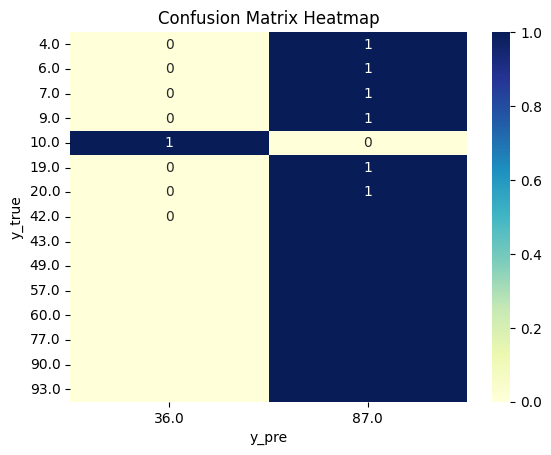

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 已知的數據
y_true = np.array([20., 60., 19., 42., 90., 6., 9., 43., 49., 77., 10., 7., 4., 93., 57.])
y_pre = np.array([87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 36, 87, 87, 87, 87])

# 將 y_true 和 y_pre 組成一個數據框
data = np.vstack([y_true,y_pre ]).T
df = pd.DataFrame(data, columns=['y_true', 'y_pre'])

# 使用 seaborn 的 heatmap 繪製熱圖
heatmap_data = df.groupby(['y_true', 'y_pre']).size().unstack().fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='g')

# 設置標籤
plt.xlabel('y_pre')
plt.ylabel('y_true')
plt.title('Confusion Matrix Heatmap')

plt.show()


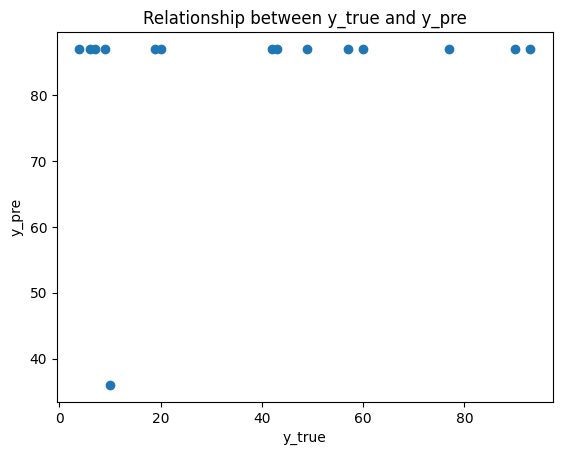

In [2]:
import matplotlib.pyplot as plt

y_true = [20., 60., 19., 42., 90., 6., 9., 43., 49., 77., 10., 7., 4., 93., 57.]
y_pre = [87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 36, 87, 87, 87, 87]

plt.plot(y_true, y_pre,'o')  # 使用 'o' 表示點狀圖
plt.xlabel('y_true')
plt.ylabel('y_pre')
plt.title('Relationship between y_true and y_pre')
plt.show()


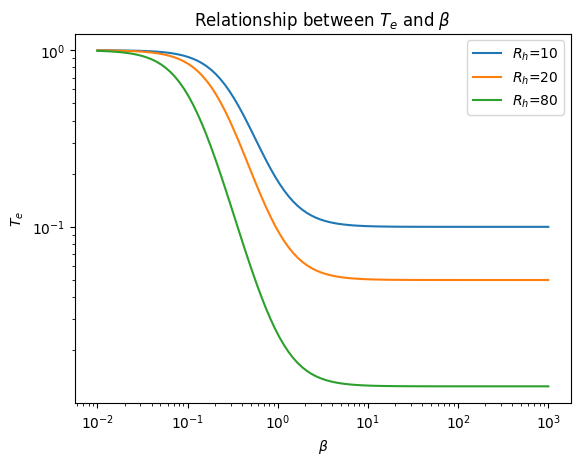

In [30]:
import numpy as np
import matplotlib.pyplot as plt




betas=np.logspace(-2,3,100)

def get_Te_dis(Rh):
    Te=[]
    for beta in betas:
        R_L=1
        y=R_L*1/(1+beta*beta)+(Rh*beta*beta)/(1+beta*beta)
        T_e=1/y
        Te.append(T_e)
    return Te


Te_Rh1=get_Te_dis(1)
Te_Rh10=get_Te_dis(10)
Te_Rh20=get_Te_dis(20)
Te_Rh40=get_Te_dis(40)
Te_Rh80=get_Te_dis(80)


plt.plot(b, Te_Rh10,label=r'$R_h$=10')# 使用 'o' 表示點狀圖
plt.plot(b, Te_Rh20,label=r'$R_h$=20')
plt.plot(b, Te_Rh80,label=r'$R_h$=80')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$T_e$')
plt.title(r'Relationship between $T_e$ and $\beta$')
plt.legend()
plt.show()

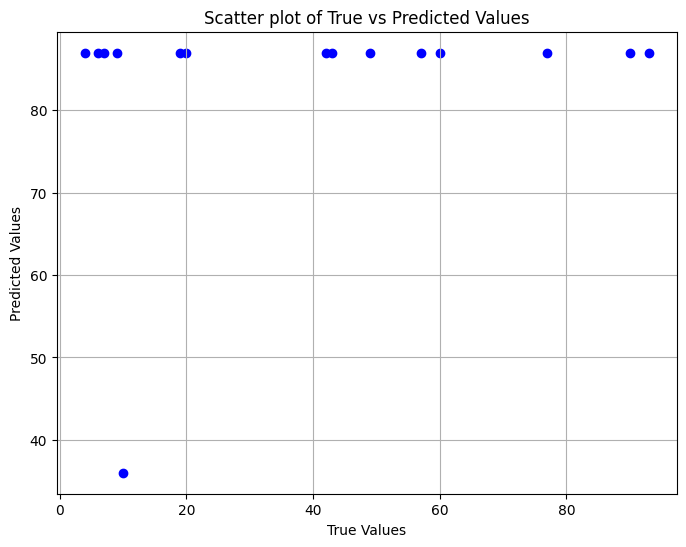

In [27]:
import matplotlib.pyplot as plt

y_true = [20., 60., 19., 42., 90., 6., 9., 43., 49., 77., 10., 7., 4., 93., 57.]
y_pre = [87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 36, 87, 87, 87, 87]

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pre, marker='o', color='blue')
#plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red')  # 將對角線畫出，作為參考
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot of True vs Predicted Values')
plt.grid(True)
plt.show()


In [4]:
import torch

# 檢查是否有可用的 CUDA 裝置
if torch.cuda.is_available():
    # 獲取第一個 CUDA 裝置的屬性
    properties = torch.cuda.get_device_properties(3)
    
    # 獲取算力（compute capability）
    compute_capability = properties.major + properties.minor / 10.0
    
    print(f"GPU Name: {properties.name}")
    print(f"Compute Capability: {compute_capability}")
    print(f"Total GPU Memory: {properties.total_memory / (1024**3):.2f} GB")
else:
    print("No CUDA devices available.")


GPU Name: NVIDIA RTX A5000
Compute Capability: 8.6
Total GPU Memory: 23.69 GB


In [2]:
import torch

print(torch.__version__)


2.0.1+cu117


In [3]:
torch.cuda.is_available()

True

In [5]:
import tqdm

In [6]:
import numpy as np
import os

In [3]:
#pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 7.9 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pillow!=8.3.*,>=5.3.0 from https://files.pythonhosted.org/packages/5d/cc/3345b8cf6f2b8c5ee33d59e3e2ddb693c45c4f3c88e10859f8b8abf9dc82/Pillow-10.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.2 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torchvision.transforms as transforms

In [6]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from PIL import Image

In [9]:
import random

In [3]:
import os
import glob

# 指定文件夹路径
folder_path = 'semi_anlayic/raif_img'

# 支持的图像文件扩展名
image_extensions = ['.jpg', '.jpeg', '.png']

# 初始化计数器
image_count = 0

# 遍历文件夹中的文件
for extension in image_extensions:
    pattern = os.path.join(folder_path, f'*{extension}')
    image_files = glob.glob(pattern)
    image_count += len(image_files)

# 打印图像数量
print(f'在文件夾 {folder_path} 中找到 {image_count} 張照片。')


在文件夾 semi_anlayic/raif_img 中找到 2550 張照片。


In [1]:
import zipfile

# 指定 zip 文件路径
zip_file_path = 'test.zip'

# 指定解压缩目标文件夹路径
extract_folder_path = 'abnor_cat_dog'

# 打开 zip 文件
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 解压缩到指定目标文件夹
    zip_ref.extractall(extract_folder_path)

# 打印成功消息
print(f'成功解壓缩文件到 {extract_folder_path}。')


成功解壓缩文件到 abnor_cat_dog。


In [2]:
import os
import random
import shutil

# 資料夾 A 的路徑
folder_A_path = 'abnor_cat_dog/test'

# 資料夾 B 的路徑
folder_B_path = 'abnor_cat_dog/B'

# 建立資料夾 B
os.makedirs(folder_B_path, exist_ok=True)

# 取得資料夾 A 中的所有檔案
all_files = os.listdir(folder_A_path)

# 隨機選取 1000 張照片
selected_files = random.sample(all_files, 1000)

# 複製選取的照片到資料夾 B
for file_name in selected_files:
    file_path_A = os.path.join(folder_A_path, file_name)
    file_path_B = os.path.join(folder_B_path, file_name)
    shutil.copyfile(file_path_A, file_path_B)

print("已完成隨機選取並儲存到資料夾 B。")


已完成隨機選取並儲存到資料夾 B。


In [1]:
import os
import random
import shutil

# 資料夾 A 的路徑
folder_A_path = 'semi_anlayic/raif_img'

# 資料夾 B 的路徑
folder_B_path = 'semi_anlayic/raif_img_test'

# 建立資料夾 B
os.makedirs(folder_B_path, exist_ok=True)

# 取得資料夾 A 中的所有檔案
all_files = os.listdir(folder_A_path)

# 隨機選取 1000 張照片
selected_files = random.sample(all_files, 283)

# 移動選取的照片到資料夾 B
for file_name in selected_files:
    file_path_A = os.path.join(folder_A_path, file_name)
    file_path_B = os.path.join(folder_B_path, file_name)
    shutil.move(file_path_A, file_path_B)

print("已完成隨機選取並剪到資料夾 B。")


已完成隨機選取並剪到資料夾 B。


In [1]:
import numpy as np

# 創建三個NumPy數組
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
array3 = np.array([7, 8, 9])

# 放在一個集合中
arrays_collection = [array1, array2, array3]

# 計算平均值
average_array = np.mean(arrays_collection, axis=0)

print("平均數組:", average_array)


平均數組: [4. 5. 6.]


In [20]:
import numpy as np
import os
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
# "ConcatDataset" and "Subset" are possibly useful when doing semi-supervised learning.
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
from torchvision.datasets import DatasetFolder, VisionDataset

# This is for the progress bar.
from tqdm.auto import tqdm
import random
import os
import cv2
import numpy as np

def RHdataset(root_dir,label_num,num_samples=None):
    if num_samples is None:
        num_samples = 100 
    Rh_data = []
    IMG_SIZE = 224
    
    img_list = [img_name for img_name in os.listdir(root_dir) if not img_name.startswith('.')]
    selected_imgs = random.sample(img_list, min(num_samples, len(img_list)))
    for img_name in selected_imgs:
        img_path = os.path.join(root_dir, img_name)
        kk = cv2.imread(img_path)  # 從path加入照片
        if kk is not None:
            new_array = cv2.resize(kk, (IMG_SIZE, IMG_SIZE),interpolation=cv2.INTER_LINEAR)           
            Rh_data.append(new_array)
        else:
            print(f"無法讀取圖像: {img_path}")
    
    avg_data=np.mean(Rh_data,axis=0)
    
    Rh_label = np.ones(1, dtype=int) * label_num
    
    return avg_data, Rh_label

In [21]:
u94_Rh1_data,u94_Rh1_label = RHdataset(root_dir=f"MAD/NEW_GRMHD_image/MAD_a+0.94/Rh1",label_num=94)

無法讀取圖像: MAD/NEW_GRMHD_image/MAD_a+0.94/Rh1/foo.txt


In [22]:
len(u94_Rh1_label)

1

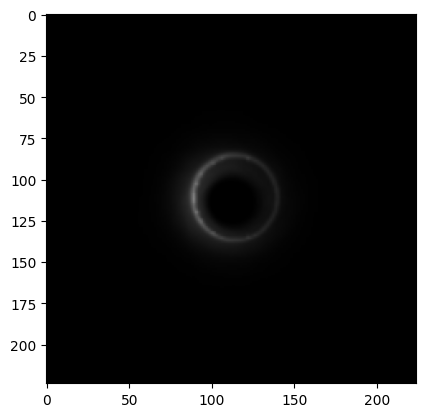

In [23]:
import matplotlib.pyplot as plt
u94_Rh1_data = np.clip(u94_Rh1_data, 0, 255).astype(np.uint8)

plt.imshow(u94_Rh1_data)
plt.show()

In [45]:
import cv2
import os

def average_images(folder_path, save_folder, n):
    # 創建儲存結果的資料夾
    os.makedirs(save_folder, exist_ok=True)

    # 取得資料夾中的所有檔案
    files = os.listdir(folder_path)
    files.sort()  # 確保檔案順序正確
    # 迴圈處理每n張圖
    for i in range(1, len(files), n):
        # 檢查是否超出索引範圍
        if i + n - 1 < len(files):
            # 讀取n張圖片
            images = [cv2.imread(os.path.join(folder_path, files[i + j])) for j in range(n)]

            # 檢查是否成功讀取圖片
            if all(img is not None and img.shape == images[0].shape for img in images):
                # 計算權重總和
                weight_sum = sum(1 / n for _ in range(n))
                
                # 將n張圖片取平均
                averaged_img = cv2.addWeighted(images[0], 1 / n, images[1], 1 / n, 0)
                for j in range(2, n):
                    averaged_img = cv2.addWeighted(averaged_img, 1, images[j], 1 / n, 0)

                # 儲存新的圖片
                save_path = os.path.join(save_folder, f'averaged_{i//n}.png')
                cv2.imwrite(save_path, averaged_img)
                print(f"已儲存 {save_path}")
            else:
                print(f"圖片讀取失敗或尺寸不同，無法取平均。")
        else:
            print(f"缺少成對的圖片，無法取平均。")

# 使用範例
aa='0'
bb='10'
nn=10

folder_path = [f'MAD/NEW_GRMHD_image/MAD_a{aa}/Rh1',f'MAD/NEW_GRMHD_image/MAD_a{aa}/Rh10',f'MAD/NEW_GRMHD_image/MAD_a{aa}/Rh20',
               f'MAD/NEW_GRMHD_image/MAD_a{aa}/Rh40',f'MAD/NEW_GRMHD_image/MAD_a{aa}/Rh80',f'MAD/NEW_GRMHD_image/MAD_a{aa}/Rh160']
save_folder = [f'mean_MAD/{bb}_a{aa}/Rh1',f'mean_MAD/{bb}_a{aa}/Rh10',f'mean_MAD/{bb}_a{aa}/Rh20',f'mean_MAD/{bb}_a{aa}/Rh40',f'mean_MAD/{bb}_a{aa}/Rh80',f'mean_MAD/{bb}_a{aa}/Rh160']

for i,j in zip(folder_path,save_folder):
    average_images(folder_path=i, save_folder=j, n=nn)
    print('ok')


已儲存 mean_MAD/10_a0/Rh1/averaged_0.png
已儲存 mean_MAD/10_a0/Rh1/averaged_1.png
已儲存 mean_MAD/10_a0/Rh1/averaged_2.png
已儲存 mean_MAD/10_a0/Rh1/averaged_3.png
已儲存 mean_MAD/10_a0/Rh1/averaged_4.png
已儲存 mean_MAD/10_a0/Rh1/averaged_5.png
已儲存 mean_MAD/10_a0/Rh1/averaged_6.png
已儲存 mean_MAD/10_a0/Rh1/averaged_7.png
已儲存 mean_MAD/10_a0/Rh1/averaged_8.png
已儲存 mean_MAD/10_a0/Rh1/averaged_9.png
ok
已儲存 mean_MAD/10_a0/Rh10/averaged_0.png
已儲存 mean_MAD/10_a0/Rh10/averaged_1.png
已儲存 mean_MAD/10_a0/Rh10/averaged_2.png
已儲存 mean_MAD/10_a0/Rh10/averaged_3.png
已儲存 mean_MAD/10_a0/Rh10/averaged_4.png
已儲存 mean_MAD/10_a0/Rh10/averaged_5.png
已儲存 mean_MAD/10_a0/Rh10/averaged_6.png
已儲存 mean_MAD/10_a0/Rh10/averaged_7.png
已儲存 mean_MAD/10_a0/Rh10/averaged_8.png
已儲存 mean_MAD/10_a0/Rh10/averaged_9.png
ok
已儲存 mean_MAD/10_a0/Rh20/averaged_0.png
已儲存 mean_MAD/10_a0/Rh20/averaged_1.png
已儲存 mean_MAD/10_a0/Rh20/averaged_2.png
已儲存 mean_MAD/10_a0/Rh20/averaged_3.png
已儲存 mean_MAD/10_a0/Rh20/averaged_4.png
已儲存 mean_MAD/10_a0/Rh20/avera

In [59]:
import cv2
import os

def average_images(folder_path, save_folder, n=5):
    # 創建儲存結果的資料夾
    os.makedirs(save_folder, exist_ok=True)

    # 取得資料夾中的所有檔案
    files = os.listdir(folder_path)
    files.sort()  # 確保檔案順序正確

    # 迴圈處理每n張圖
    for i in range(0, len(files), n):
        # 檢查是否超出索引範圍
        if i + n - 1 < len(files):
            # 讀取n張圖片
            images = [cv2.imread(os.path.join(folder_path, files[i + j])) for j in range(n)]

            # 檢查是否成功讀取圖片
            if all(img is not None and img.shape == images[0].shape for img in images):
                # 計算權重總和
                weight_sum = sum(1 / n for _ in range(n))
                
                # 將n張圖片取平均
                averaged_img = cv2.addWeighted(images[0], 1 / n, images[1], 1 / n, 0)
                for j in range(2, n):
                    averaged_img = cv2.addWeighted(averaged_img, 1, images[j], 1 / n, 0)

                # 儲存新的圖片
                save_path = os.path.join(save_folder, f'averaged_{i//n}.png')
                cv2.imwrite(save_path, averaged_img)
                print(f"已儲存 {save_path}")
            else:
                print(f"圖片讀取失敗或尺寸不同，無法取平均。")
        else:
            print(f"缺少成對的圖片，無法取平均。")

# 使用範例
folder_path = 'MAD/NEW_GRMHD_image/MAD_a0/Rh160'
save_folder = 'mean_MAD/5_a0/Rh160'
average_images(folder_path, save_folder, n=5)
print('ok')


圖片讀取失敗或尺寸不同，無法取平均。
已儲存 mean_MAD/5_a0/Rh160/averaged_1.png
已儲存 mean_MAD/5_a0/Rh160/averaged_2.png
已儲存 mean_MAD/5_a0/Rh160/averaged_3.png
已儲存 mean_MAD/5_a0/Rh160/averaged_4.png
已儲存 mean_MAD/5_a0/Rh160/averaged_5.png
已儲存 mean_MAD/5_a0/Rh160/averaged_6.png
已儲存 mean_MAD/5_a0/Rh160/averaged_7.png
已儲存 mean_MAD/5_a0/Rh160/averaged_8.png
已儲存 mean_MAD/5_a0/Rh160/averaged_9.png
已儲存 mean_MAD/5_a0/Rh160/averaged_10.png
已儲存 mean_MAD/5_a0/Rh160/averaged_11.png
已儲存 mean_MAD/5_a0/Rh160/averaged_12.png
已儲存 mean_MAD/5_a0/Rh160/averaged_13.png
已儲存 mean_MAD/5_a0/Rh160/averaged_14.png
已儲存 mean_MAD/5_a0/Rh160/averaged_15.png
已儲存 mean_MAD/5_a0/Rh160/averaged_16.png
已儲存 mean_MAD/5_a0/Rh160/averaged_17.png
已儲存 mean_MAD/5_a0/Rh160/averaged_18.png
已儲存 mean_MAD/5_a0/Rh160/averaged_19.png
缺少成對的圖片，無法取平均。
ok


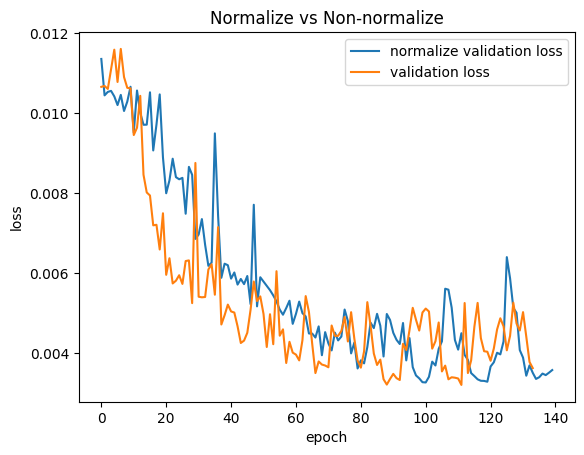

In [14]:
import matplotlib.pyplot as plt
import numpy as np

file_path = 'qq1.txt'
data = np.genfromtxt(file_path, delimiter=',', names=True)

nr_tr = data['pp']
nr_val = data['aa']

file_path2 = 'qq2.txt'
data2 = np.genfromtxt(file_path2, delimiter=',', names=True)

tr = data2['pp']
val = data2['aa']

#plt.plot(nr_tr,label='normalize training loss')
plt.plot(nr_val,label='normalize validation loss')
#plt.plot(tr,label='training loss')
plt.plot(val,label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.ylim(0,0.02)
plt.title('Normalize vs Non-normalize')
plt.legend()

In [9]:
import numpy as np

# 从文件加载数据
file_path = 'qq1.txt'
data = np.genfromtxt(file_path, delimiter=',', names=True)

# 创建数组
zz = data['pp']
xx = data['aa']

# 打印结果
print("zz array:", zz)
print("xx array:", xx)


zz array: [0.02261373 0.01073069 0.01049434 0.01036657 0.01020223 0.01011894
 0.00999228 0.00999264 0.00969732 0.00959558 0.00959081 0.00930913
 0.00902285 0.00892954 0.00871528 0.00854269 0.00820684 0.0079781
 0.00794576 0.00745971 0.00753056 0.00741241 0.00709973 0.00691443
 0.00660749 0.00671082 0.00630669 0.00625651 0.00628535 0.00610254
 0.0058016  0.00572397 0.00557954 0.00562806 0.00534838 0.00527097
 0.00528516 0.00494902 0.004738   0.00449253 0.00442705 0.00439159
 0.00445459 0.00432456 0.00432226 0.00421193 0.00425235 0.00398554
 0.00378063 0.0037389  0.0038379  0.00380396 0.00337414 0.00336089
 0.00324736 0.00314271 0.00282069 0.00275965 0.00277172 0.00255538
 0.0023788  0.00230857 0.00252443 0.00254729 0.00222815 0.00192303
 0.00200947 0.00165241 0.00160033 0.00135352 0.00131758 0.00115306
 0.00129354 0.00156141 0.00146908 0.00191683 0.00166726 0.00113989
 0.0008857  0.00084284 0.00095131 0.00098989 0.00099556 0.00102241
 0.00185033 0.0016778  0.00153933 0.00104378 0.001616

In [1]:
'''
import cv2
import os
import numpy as np

def load_images_as_array(folder_path):
    image_data = []
    
    for img_name in os.listdir(folder_path):
        if not img_name.startswith('.'):
            img_path = os.path.join(folder_path, img_name)
            img_array = cv2.imread(img_path)
            
            if img_array is not None:
                image_data.append(img_array)
            else:
                print(f"無法讀取圖像: {img_path}")

    return image_data

# 指定照片所在的路徑
image_folder_path = "rand_SANE_a+0.94/Rh1/"

# 載入照片並轉為 NumPy array
images_as_array = load_images_as_array(image_folder_path)

# 印出每張照片的形狀
for i, img_array in enumerate(images_as_array):
    print(f"照片 {i+1} 形狀: {img_array.shape}")
'''

'\nimport cv2\nimport os\nimport numpy as np\n\ndef load_images_as_array(folder_path):\n    image_data = []\n    \n    for img_name in os.listdir(folder_path):\n        if not img_name.startswith(\'.\'):\n            img_path = os.path.join(folder_path, img_name)\n            img_array = cv2.imread(img_path)\n            \n            if img_array is not None:\n                image_data.append(img_array)\n            else:\n                print(f"無法讀取圖像: {img_path}")\n\n    return image_data\n\n# 指定照片所在的路徑\nimage_folder_path = "rand_SANE_a+0.94/Rh1/"\n\n# 載入照片並轉為 NumPy array\nimages_as_array = load_images_as_array(image_folder_path)\n\n# 印出每張照片的形狀\nfor i, img_array in enumerate(images_as_array):\n    print(f"照片 {i+1} 形狀: {img_array.shape}")\n'

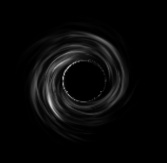

In [1]:
from IPython.display import Image
image_path = 'GRMHG/GRMHG_data/SANE_a0/Rh1/image_a0_1000_163_0_230.e9_6.2e9_1.38083e+28_1.jpg'
Image(filename=image_path)

In [2]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 510.3 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pandas>=0.25 from https://files.pythonhosted.org/packages/bc/7e/a9e11bd272e3135108892b6230a115568f477864276181eada3a35d03237/pandas-2.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.1 from https://files.pythonhosted.org/packages/e0/8b/b62bc50b01bb2d4af96bc0045c39d60209e2701e172789ceace20a0866b2/matplotlib-3.8.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/2b/c0/24c34c41a180f875419b536125799c61e2330b997d77a5a818a3bc3e08cd/contourpy-1.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/50/2e31753c088d364756daa5bed0dab6a5928ebfd6e6d26f975c8

In [7]:
from sklearn.metrics import confusion_matrix

In [4]:
pip install --upgrade scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/a3/d3/f88285098505c8e5d141678a24bb9620d902c683f11edc1eb9532b02624e/scipy-1.11.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 779.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 2.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.1
    Uninstalling scipy-1.8.1:
      Successfully uninstalled scipy-1.8.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip uninstall pandas
pip install numpy==1.22.4  # 替换成符合 Pandas 要求的版本
pip install pandas

SyntaxError: invalid syntax (3268258827.py, line 1)

  0%|          | 0/100 [00:00<?, ?it/s]

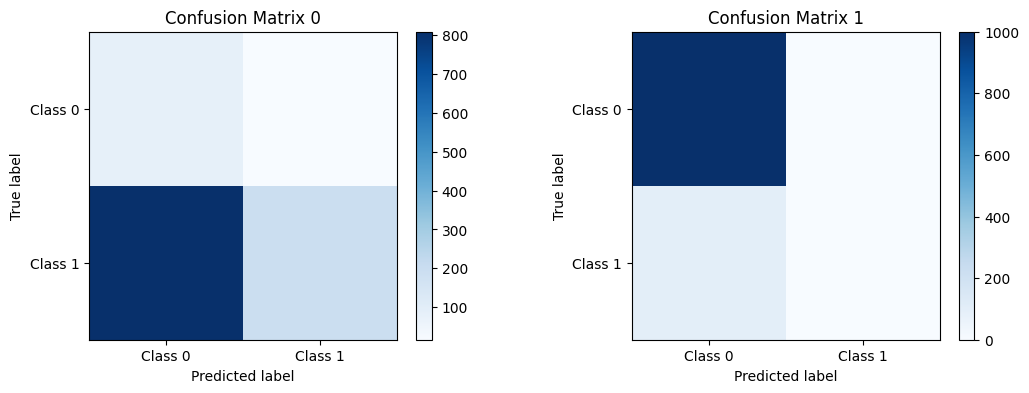

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# 定義 Autoencoder 模型
class Autoencoder(nn.Module):
    def __init__(self):
        super(conv_autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 12, 4, stride=2, padding=1),         
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),        
            nn.ReLU(),
			      nn.Conv2d(24, 48, 4, stride=2, padding=1),         
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
			      nn.ConvTranspose2d(48, 24, 4, stride=2, padding=1),
            nn.ReLU(),
			      nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1), 
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 創建正常資料和異常資料
normal_data = torch.randn(1000, 28 * 28)  # 1000 筆正常資料
anomaly_data = torch.randn(100, 28 * 28)  # 100 筆異常資料

# 將正常資料標記為 0，異常資料標記為 1
normal_labels = torch.zeros(1000, dtype=torch.long)
anomaly_labels = torch.ones(100, dtype=torch.long)

# 將多標籤資料轉換為二元資料
binary_labels = torch.cat([normal_labels, anomaly_labels], dim=0)
binary_data = torch.cat([normal_data, anomaly_data], dim=0)

# 將資料合併並建立 DataLoader
#all_data = torch.cat([normal_data, anomaly_data], dim=0)
#all_labels = torch.cat([normal_labels, anomaly_labels], dim=0)

dataset = TensorDataset(binary_data, binary_labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# 初始化模型、損失函數和優化器
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    for data, _ in dataloader:
        data = data.view(-1, 28 * 28)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()

# 模型訓練完成後，使用混淆矩陣評估模型在正常和異常資料上的表現
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data, labels in dataloader:
        data = data.view(-1, 28 * 28)
        outputs = model(data)
        preds = torch.where(outputs < 0.5, torch.tensor(0), torch.tensor(1))
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# 計算混淆矩陣
binary_preds = np.argmax(all_preds, axis=1)

# 計算多標籤混淆矩陣
conf_matrix = multilabel_confusion_matrix(all_labels, binary_preds, labels=[0, 1])
fig, axs = plt.subplots(1, len(conf_matrix), figsize=(12, 4))

# 設定每個子圖之間的間距
plt.subplots_adjust(wspace=0.4)

# 遍歷每個混淆矩陣
for i, (ax, cm) in enumerate(zip(axs, conf_matrix)):
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'Confusion Matrix {i}')
    plt.colorbar(ax.images[0], ax=ax)

    classes = ['Class 0', 'Class 1']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

plt.show()

